In [29]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
from numpy.fft import fft
from scipy.signal import find_peaks


**This is the address from which python takes the data. Please update accordingly!**
You have to put the address of the folder in which the files are stored, and then a "//wrd". Remember that the files should be named *wrdnn_chcc*, where nn is the number of the board, and cc should be the number of the channel (e.g. "wrd02_ch00.csv"). Please note that the format of the file should be csv, and that, even if the number is a single digit, to write it as a two digit (as in the previous example).

In [30]:
address_selected = "C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01_new//wrd"

In [31]:
WRDs= ["02", "03", "04", "05", "06", "07", "09", "10", "11", "12"]


C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch00.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch01.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch02.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch03.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch04.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch05.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch06.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch07.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch08.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch09.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch10.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch11.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch12.csv
C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01\wrd02_ch13.csv
C://Users//User//Des

(-0.7, 0.7)

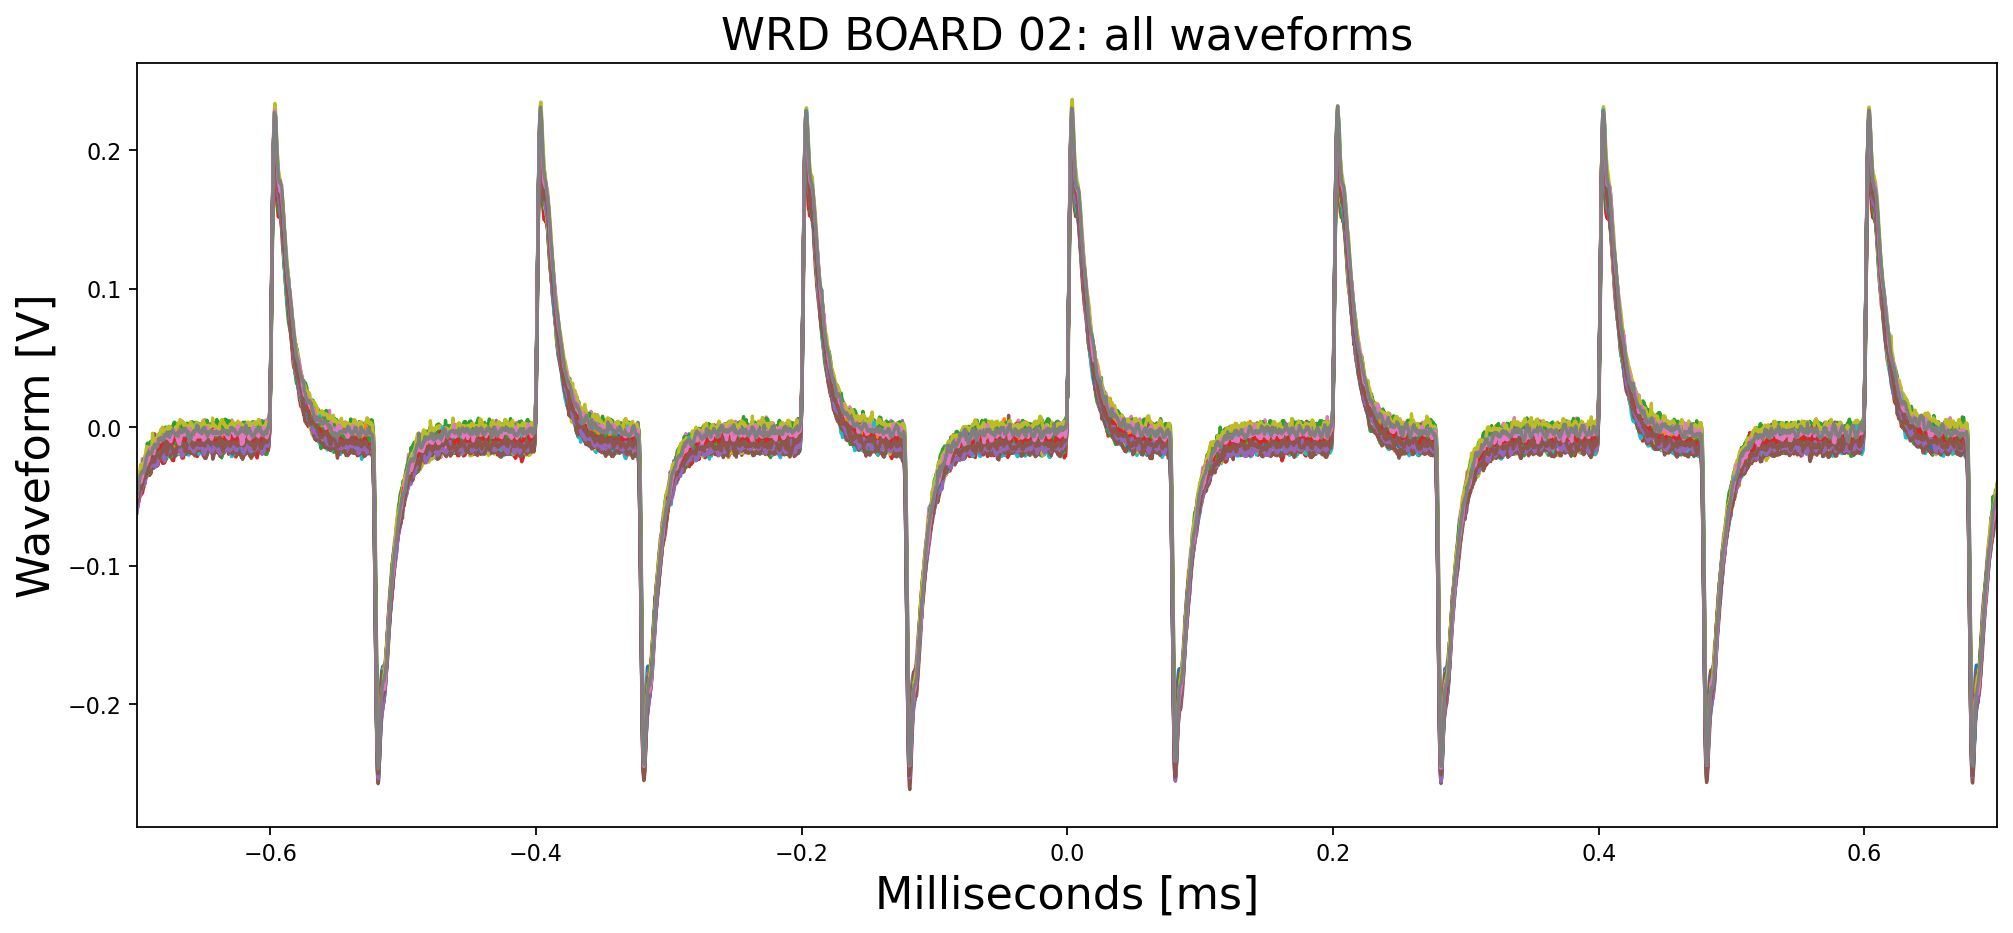

In [32]:
WRD='02'

address = address_selected + WRD +"_ch*.csv"
all_channels = glob.glob(address)

df = pd.read_csv(all_channels[0], skiprows=9)
plt.figure(figsize = (15,6.2), dpi = 160)
all_df = []
for file_channel in all_channels:
    print(file_channel)
    all_df.append(pd.read_csv(file_channel, skiprows=9))
for i, df in enumerate(all_df):
    plt.plot(df['Time (s)']*1e3, df['Channel 3 (V)'], label=f"channel_{i}")
plt.xlabel("Milliseconds [ms]", fontsize=20)
plt.ylabel("Waveform [V]", fontsize=20)
plt.title(f"WRD BOARD {WRD}: all waveforms", fontsize=20)
#plt.xlim(-0.7, 0.7)
plt.xlim(-0.7,0.7)
    

In [33]:
all_df = [pd.read_csv(file_channel, skiprows=9, comment='#') for file_channel in all_channels]

In [38]:
def plot_double(x, y, name,legend = False, save = False, address_save = None):

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
    ax1.scatter(x, y)
    ax1.set_xlabel("Channel", fontsize=20)
    ax1.set_ylabel("Amplitude [V] ($V_{pp}$)", fontsize=20)
    fig.suptitle(f"WRD BOARD {name}: amplitude vs channel", fontsize=20)
    ax1.grid()
    ax1.xaxis.set_major_locator(tck.MultipleLocator(2))
    ax1.tick_params(rotation = 30)
    ax1.set_xlim(-1,48)
    ax1.set_ylim(0.1,0.6)
    
    ax2.hist(y)
    ax2.set_xlabel("Amplitude $V_{pp}$ [V]")
    if legend:
        ax1.legend()
    if save:
        plt.savefig(address_save)

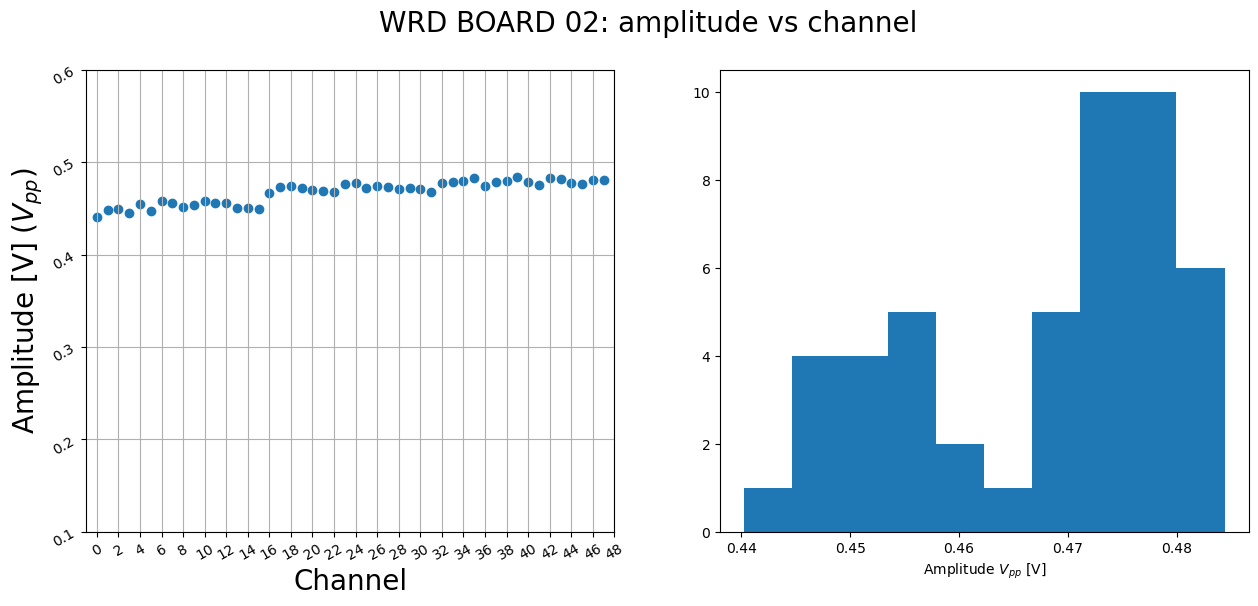

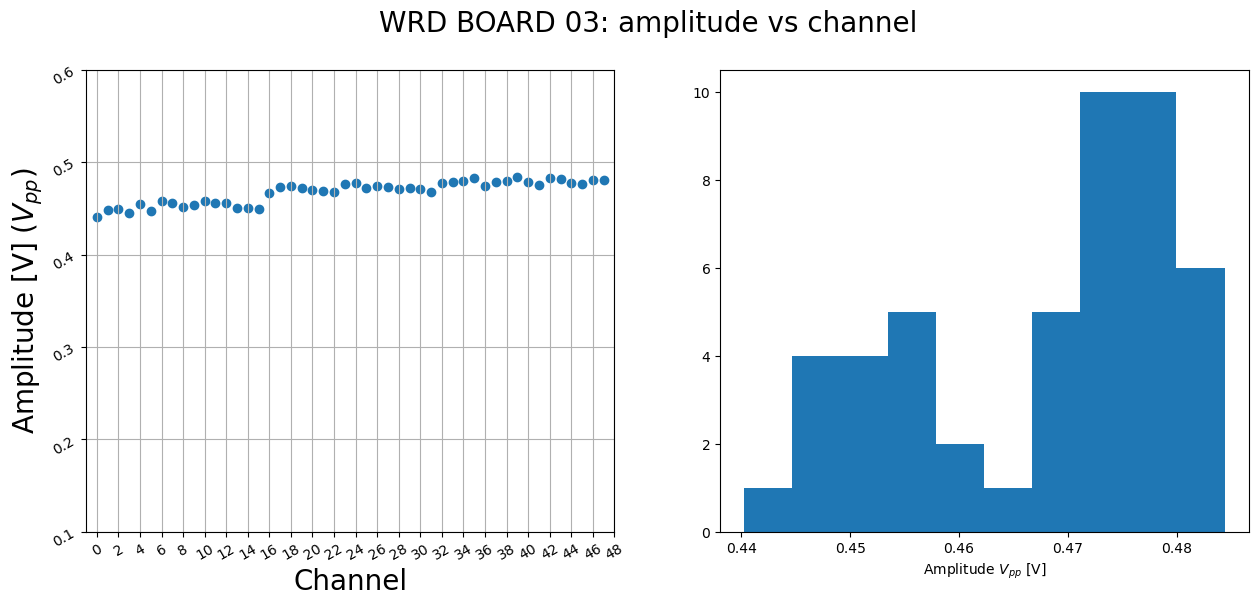

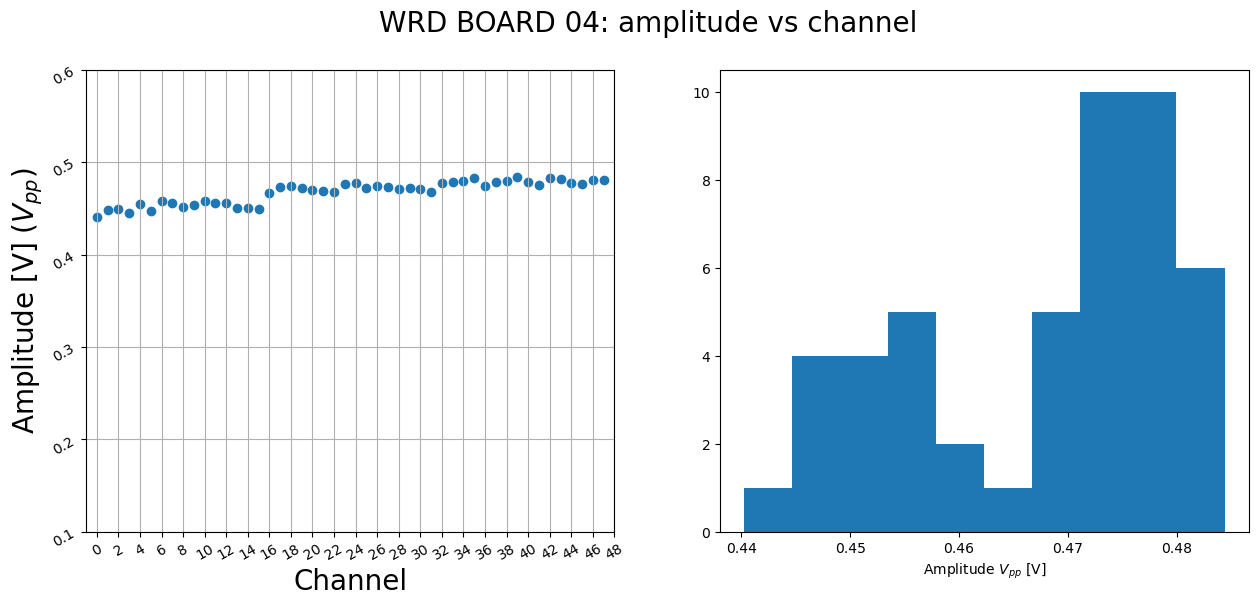

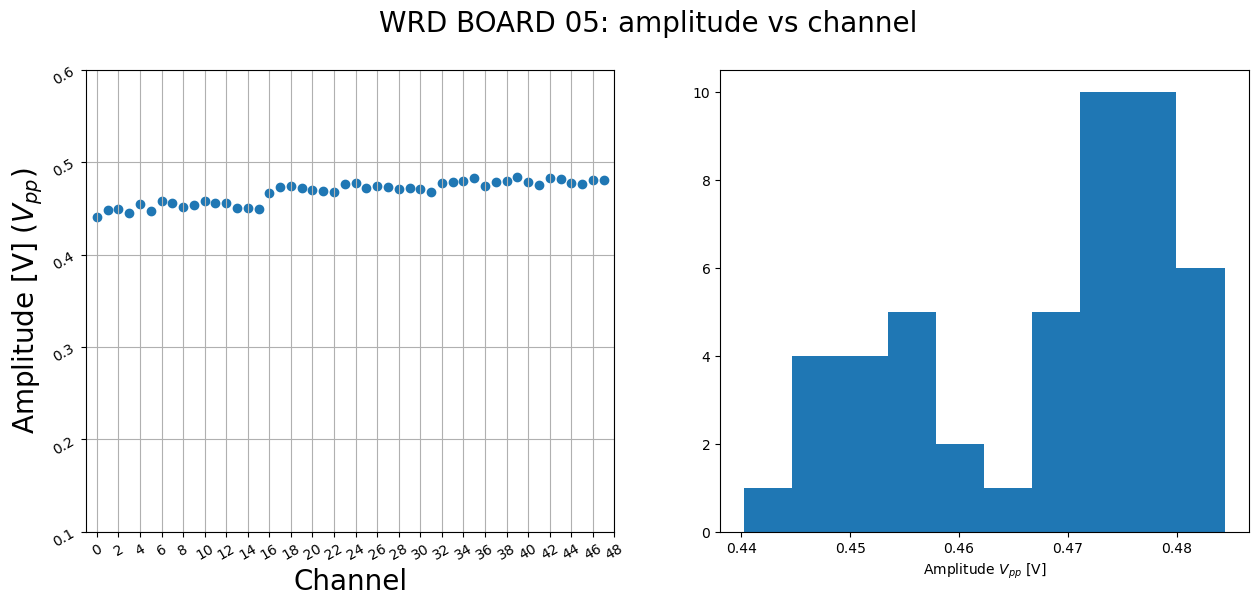

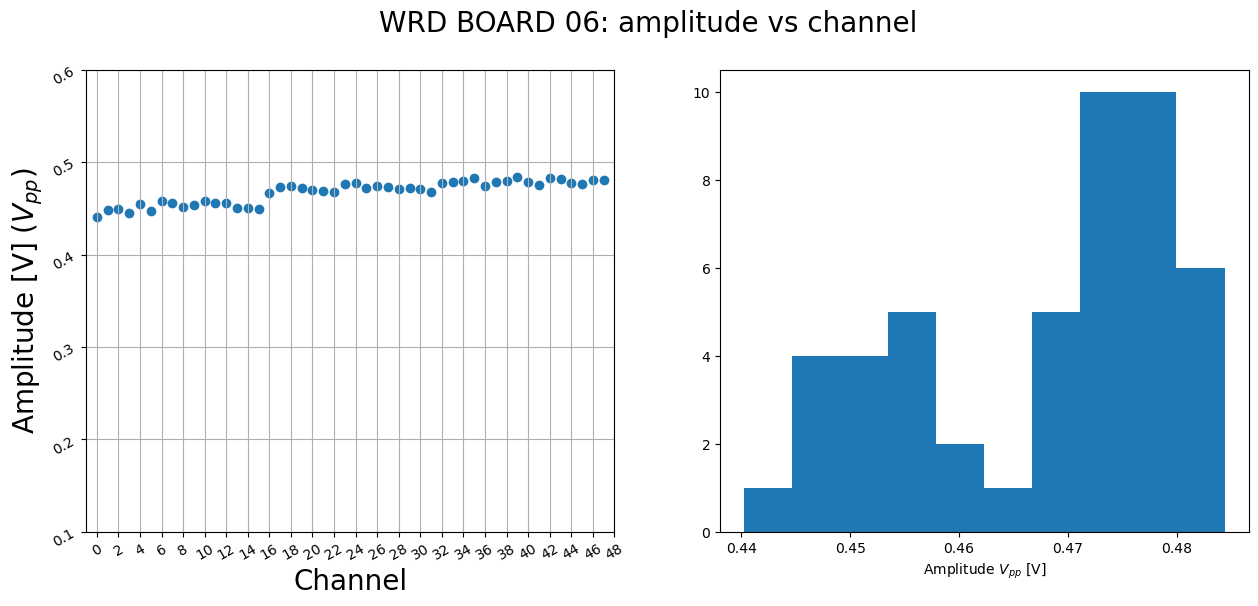

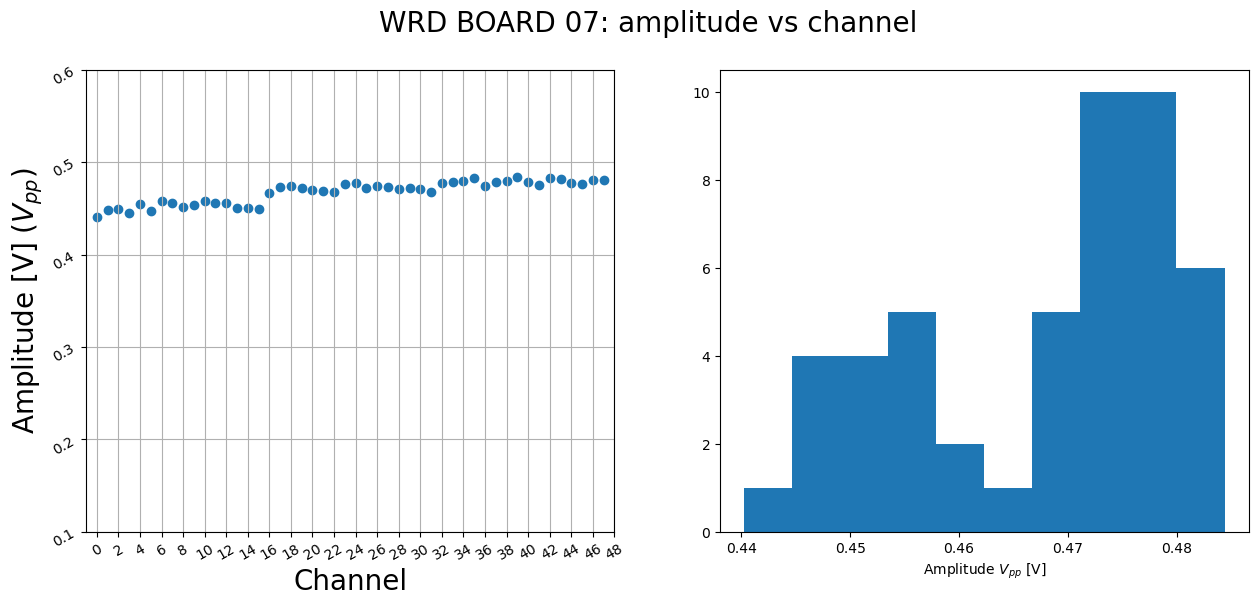

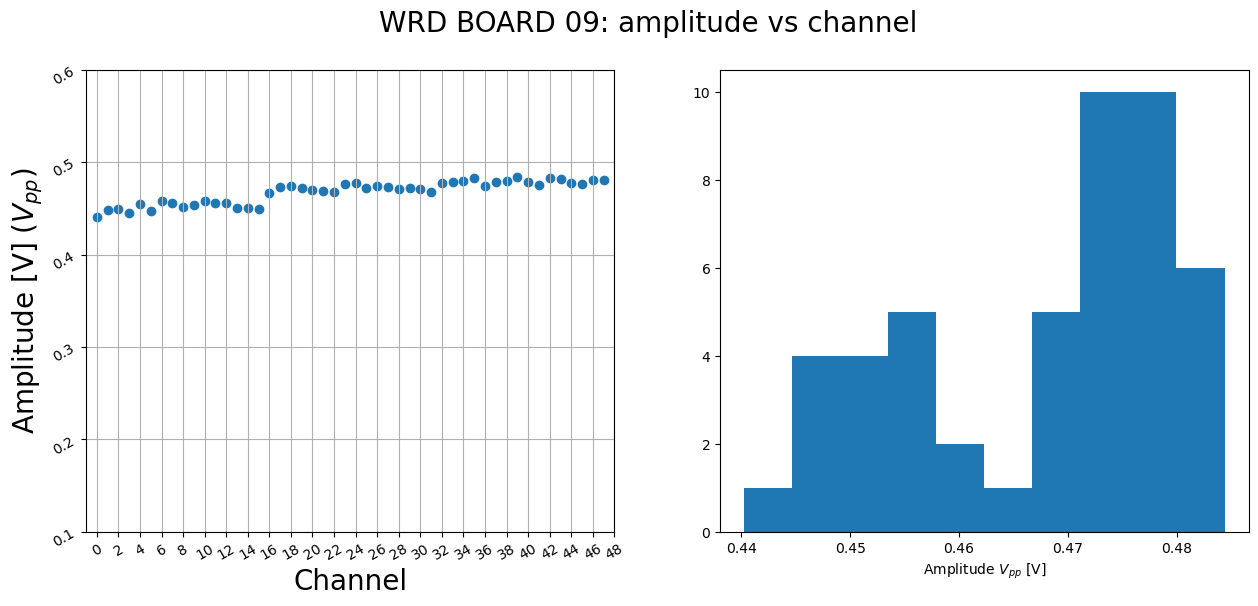

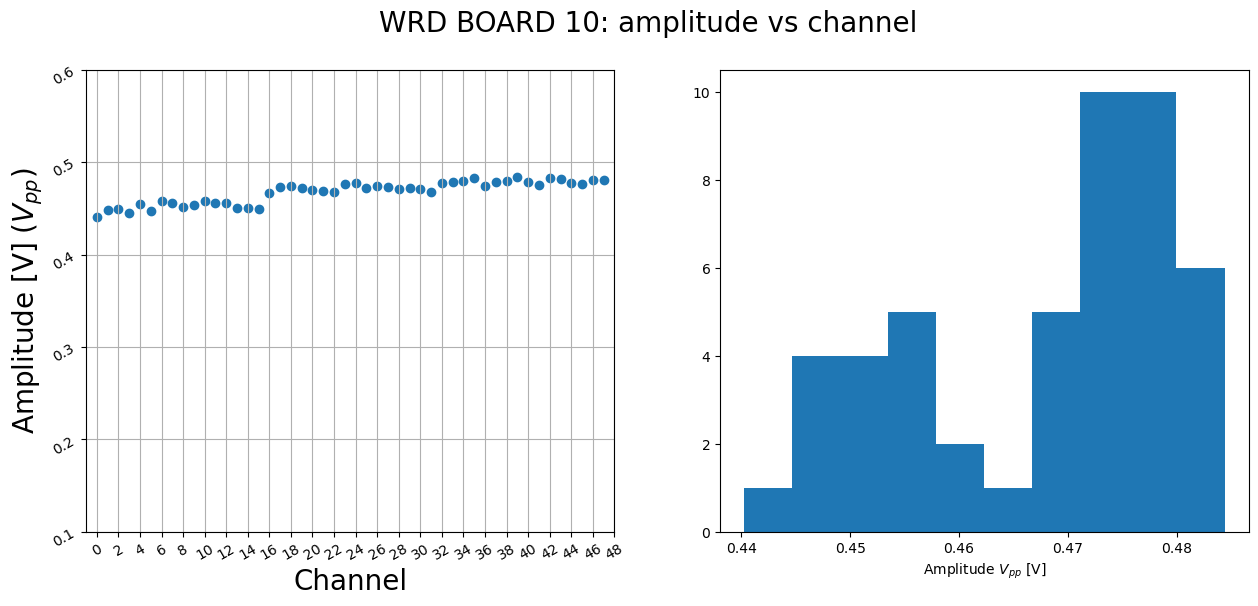

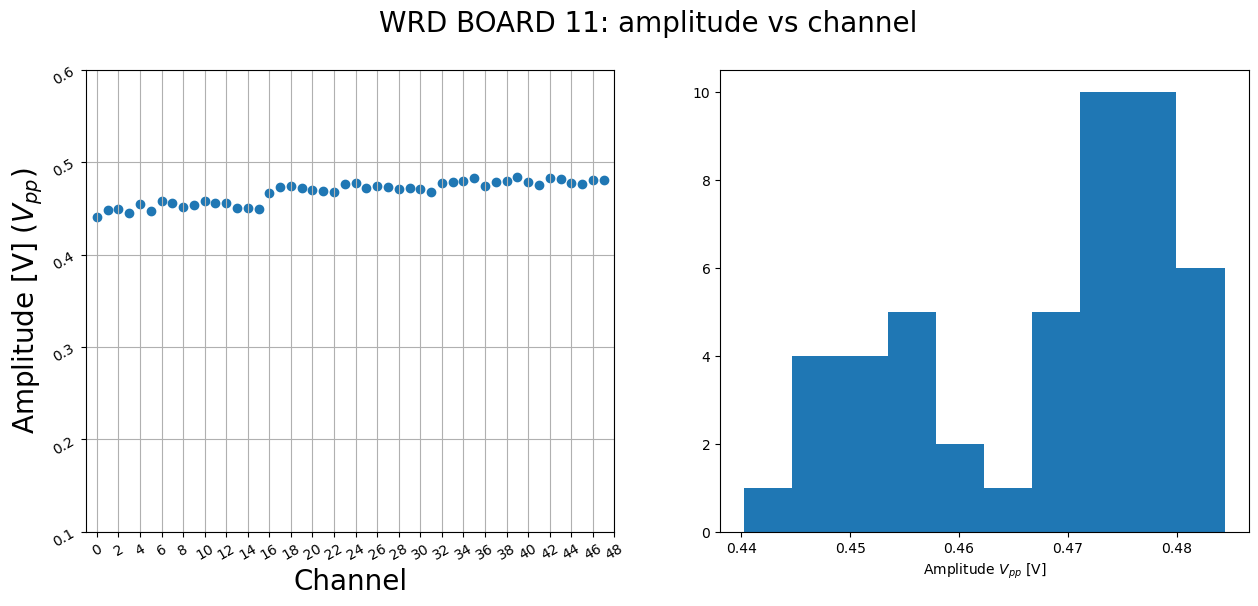

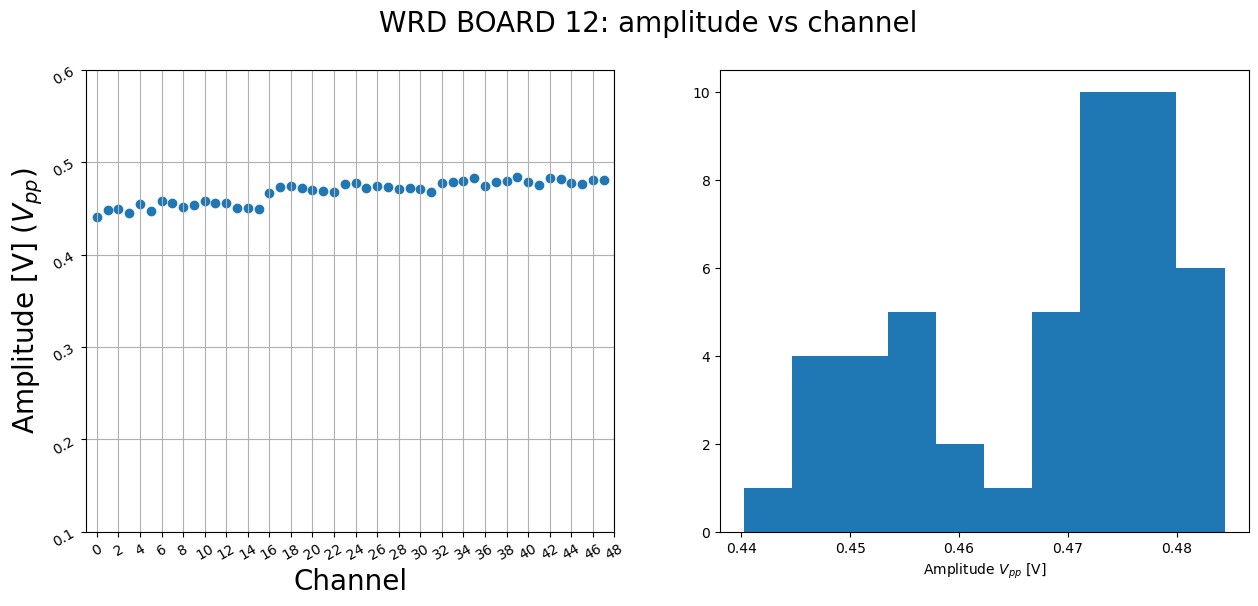

In [39]:
for WRD in WRDs:
    address = address_selected + WRD +"_ch*.csv"
    all_channels = glob.glob(address)
    x, y = [], []
    for i, df in enumerate(all_df):
        amplitude = np.max(df['Channel 3 (V)']) -  np.min(df['Channel 3 (V)'])
        x.append(i)
        y.append(amplitude)
    plot_double(x,y, str(WRD), save= True, address_save="C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01//amplitude plot/WRD"+ WRD  )


In [40]:
def plot_double_time(x, y, name,legend = False, save = False, address_save = None):

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
    ax1.scatter(x, y)
    ax1.set_xlabel("Channel", fontsize=20)
    ax1.set_ylabel("Period [ms]", fontsize=20)
    ax1.grid()
    ax1.xaxis.set_major_locator(tck.MultipleLocator(2))
    ax1.tick_params(rotation = 30)
    ax1.set_xlim(-1,48)
    
    ax2.hist(y)
    ax2.set_xlabel("Period [ms]")
    fig.suptitle(f"WRD BOARD {name}: period vs channel", fontsize=20)

    if legend:
        ax1.legend()
    if save:
        plt.savefig(address_save)


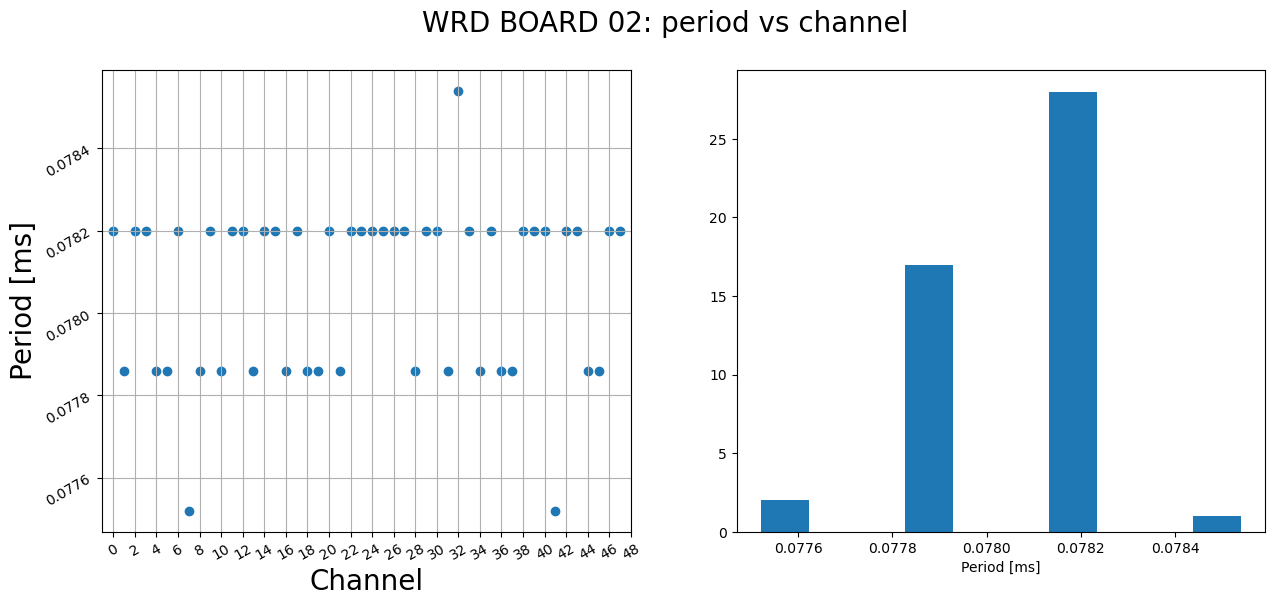

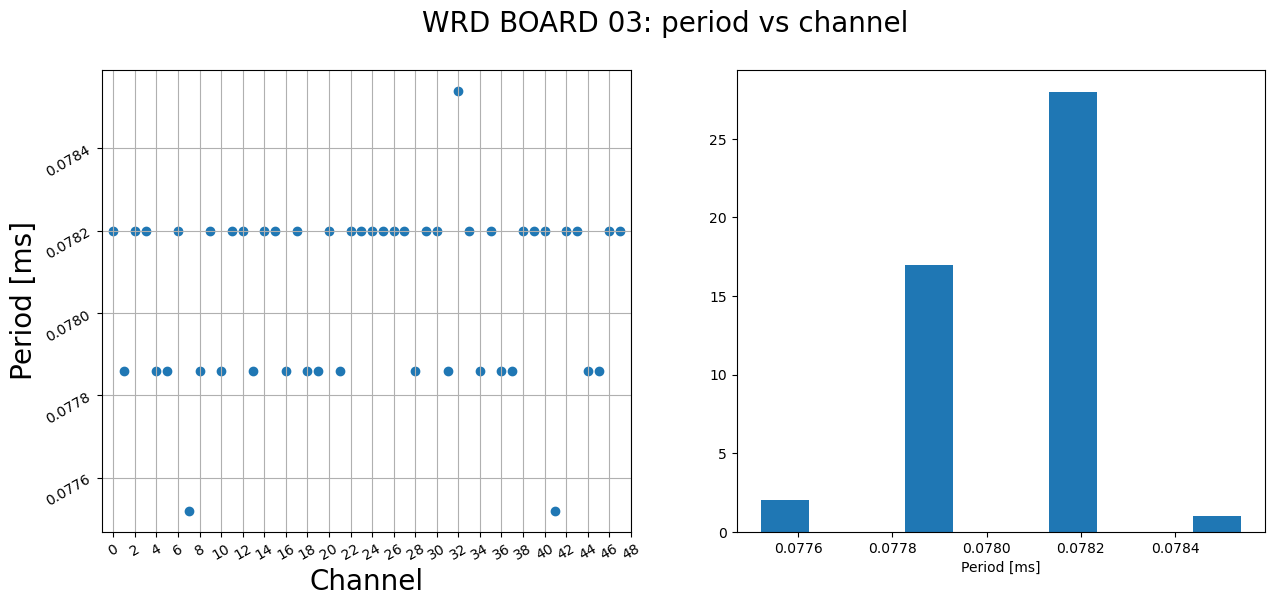

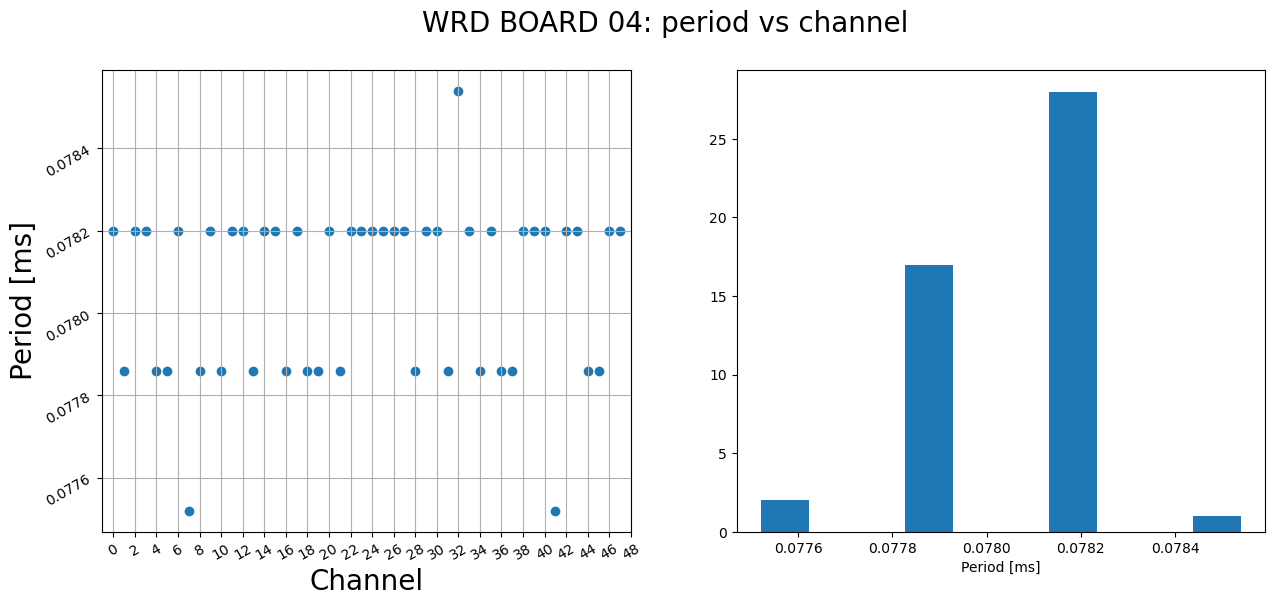

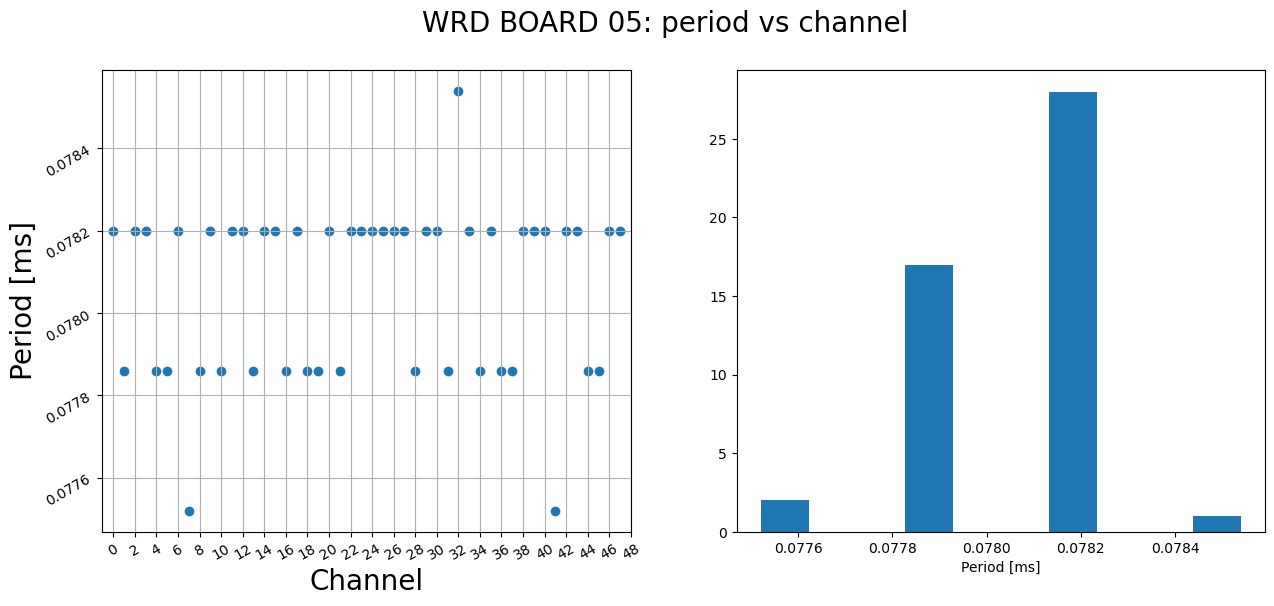

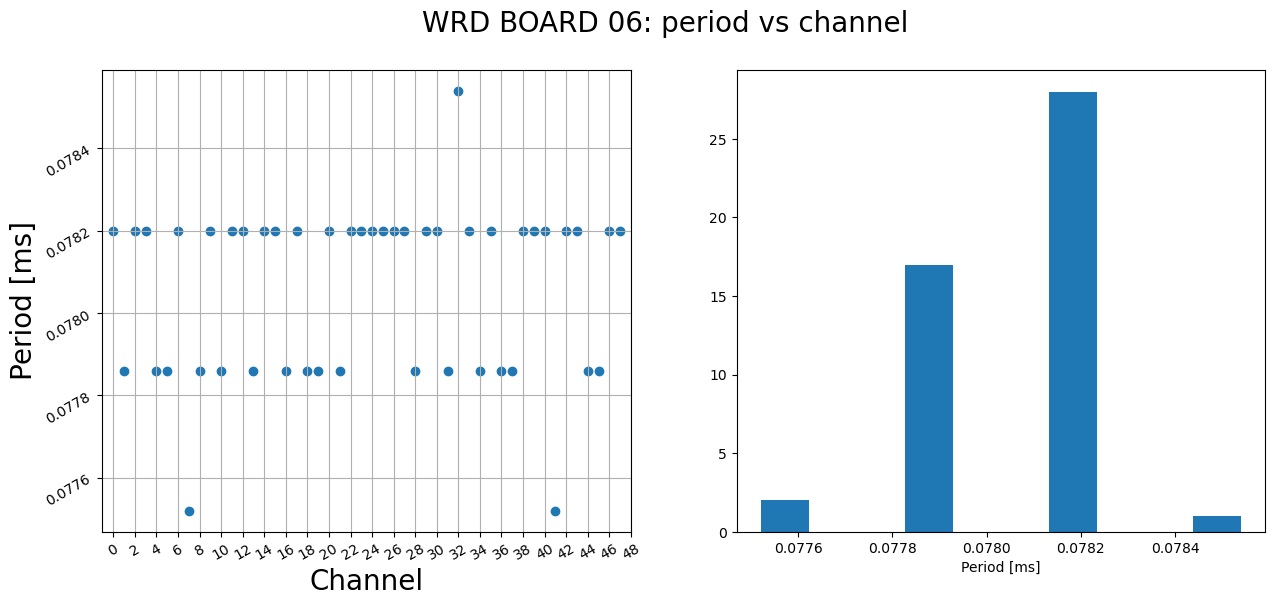

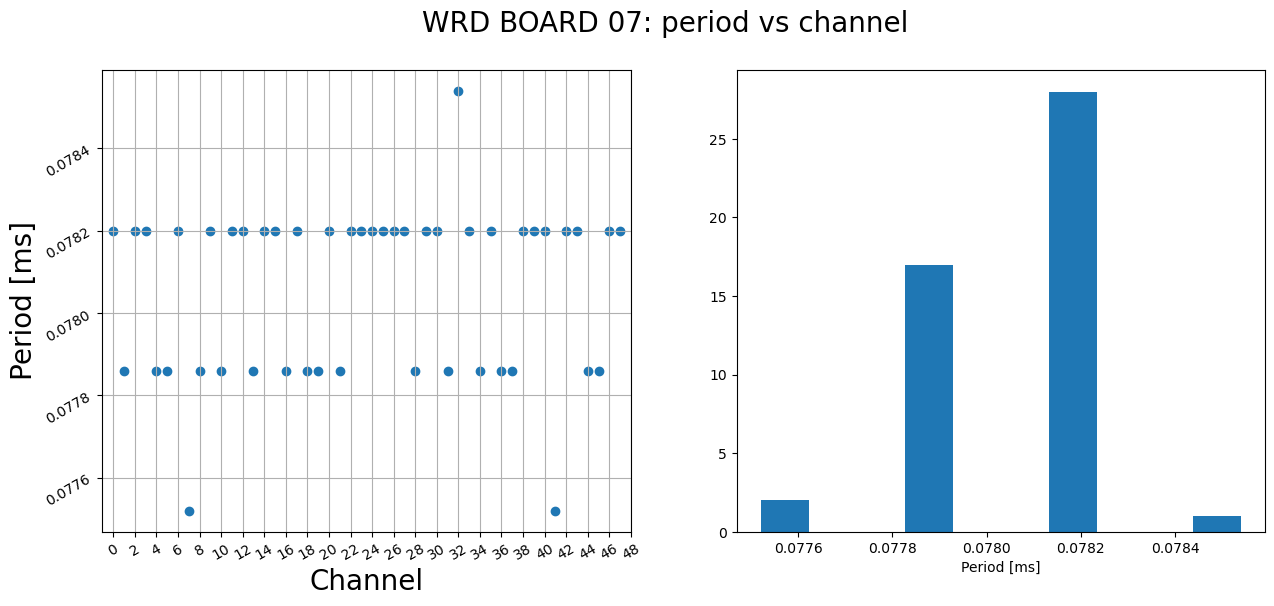

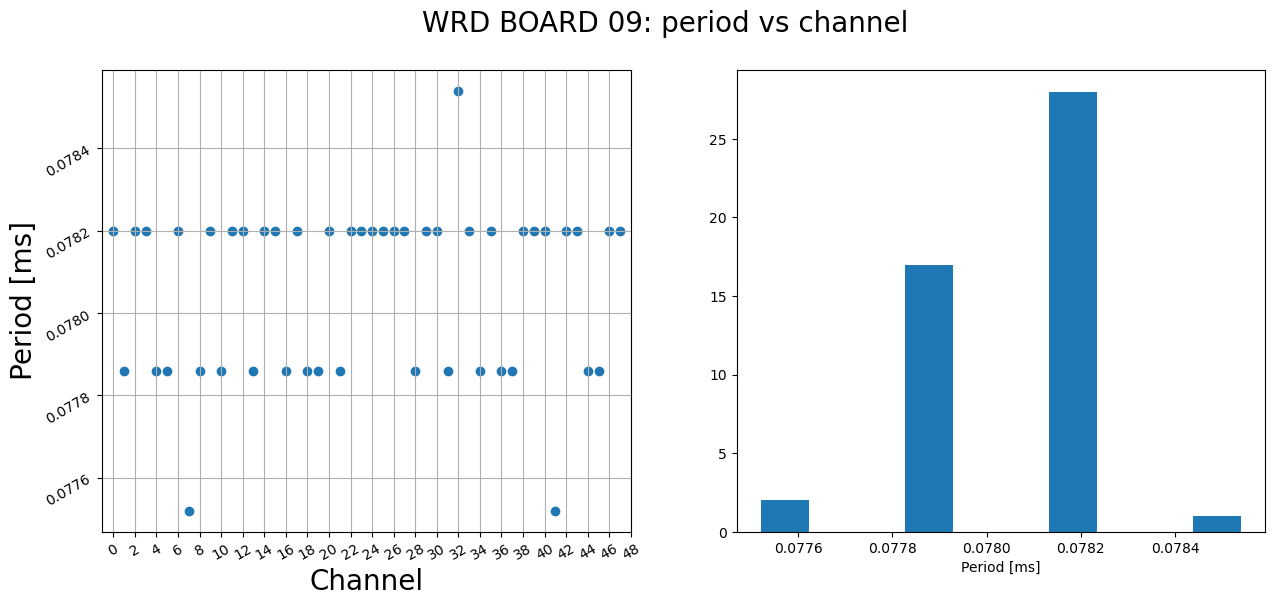

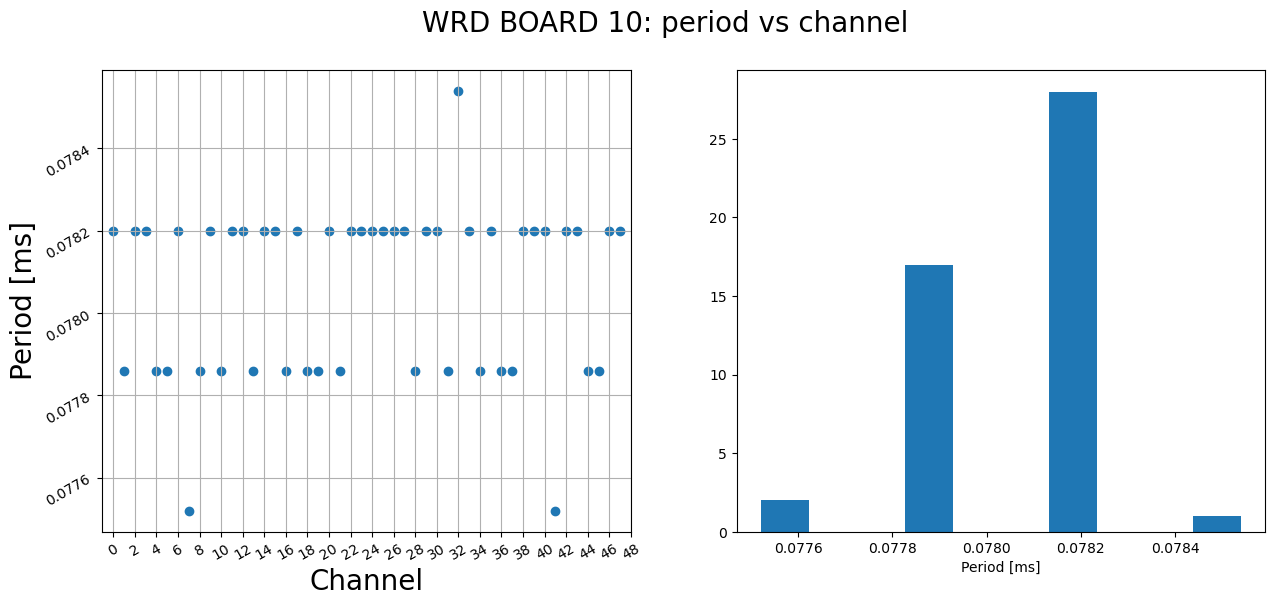

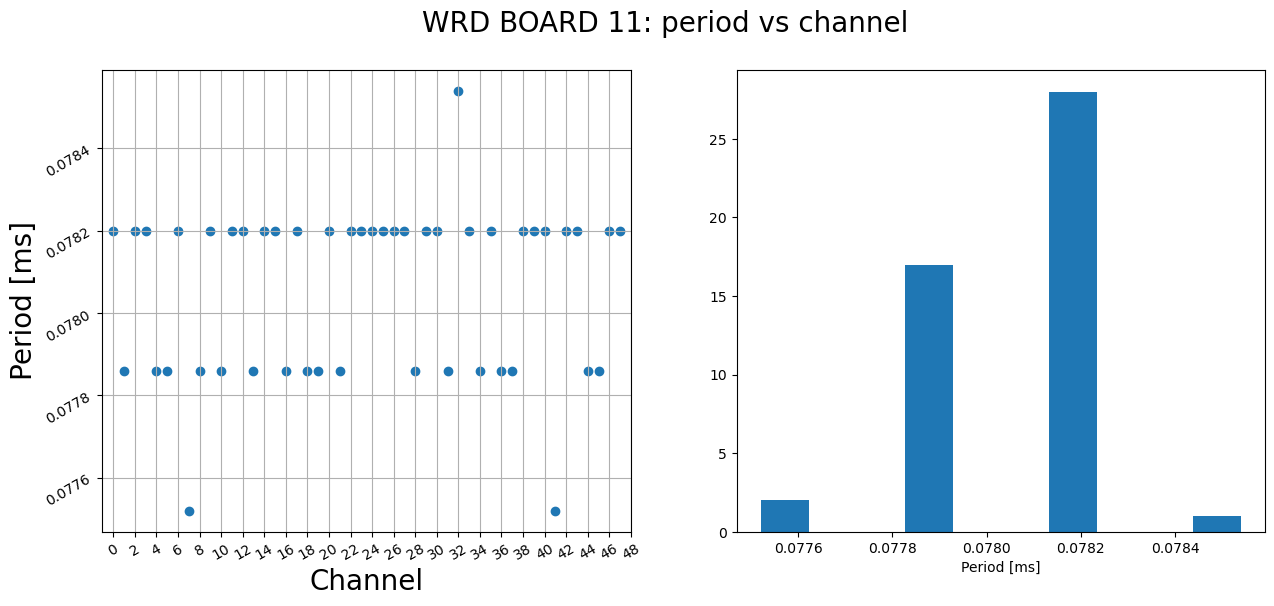

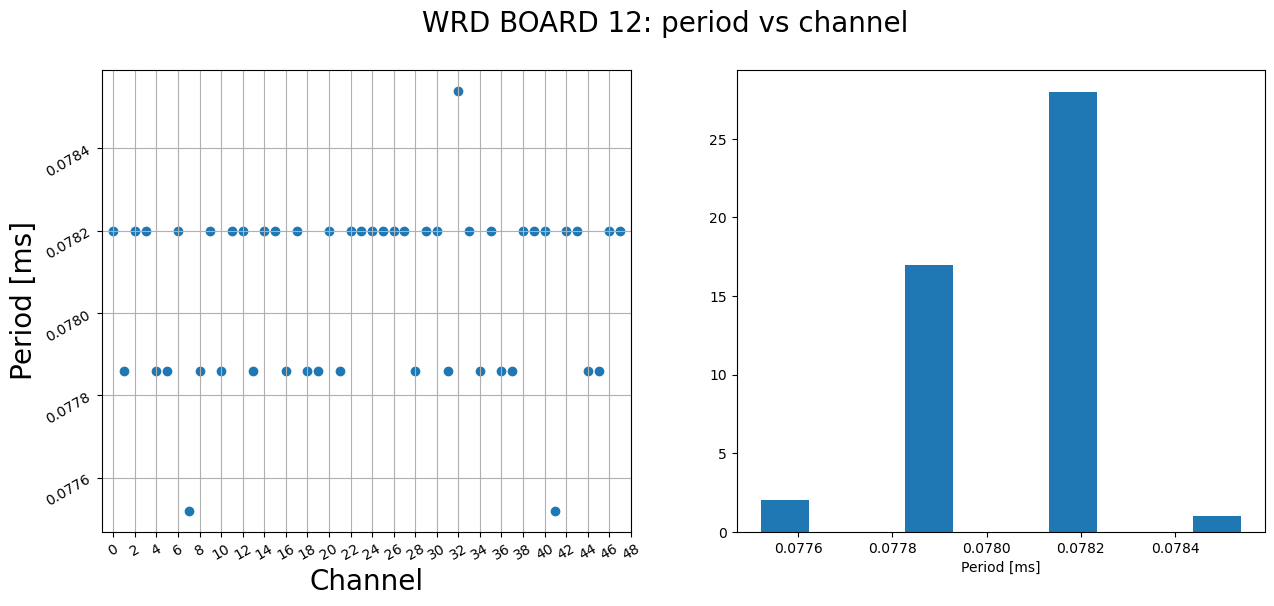

In [41]:
#PLOT period (y) FOR EACH CHANNEL (x)
for WRD in WRDs:

    x ,y= [], []   
    
    for channel, df in enumerate(all_df):
        signal = np.array(df['Channel 3 (V)'].to_list())
        time = df["Time (s)"].to_list()    
        peaks_up = find_peaks(signal, prominence=0.15)
        peaks_dw = find_peaks(-signal, prominence= 0.15)
        
        try:
            if peaks_up[0][0] > peaks_dw[0][0]:
        
                period = (time[int(peaks_dw[0][1])]-time[int(peaks_up[0][0])])*1e3
            else:
                period = (time[int(peaks_up[0][0])]- time[int(peaks_dw[0][0])])*1e3
        except IndexError:
            continue    

        x.append(channel)
        y.append(period)

    plot_double_time(x,y, WRD,  save= True, address_save="C://Users//User//Desktop//flab//WRD tests//cmb03_d2s01//period plot/WRD"+ WRD )

    